In [1]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch the dataset
individual_household_electric_power_consumption = fetch_ucirepo(id=235)

# Extract features and targets as pandas dataframes
X = individual_household_electric_power_consumption.data.features
y = individual_household_electric_power_consumption.data.targets

# Combine features and targets into a single dataframe
dataset = pd.concat([X, y], axis=1)

# Save the dataset to a CSV file
csv_file_name = "electric_power_consumption.csv"
dataset.to_csv(csv_file_name, index=False)

print(f"Dataset saved to {csv_file_name}")


/home/ifrasaleem/Downloads/Project-3/GLP Project-3/env/lib/python3.10/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


Dataset saved to electric_power_consumption.csv


In [ ]:
# Combine features and targets into a single DataFrame for analysis
data = pd.concat([X, y], axis=1)
# Convert the Date column (if present) into datetime format
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')  # Handle errors gracefully

# Drop rows with parsing errors (NaT in the Date column)
data = data.dropna(subset=['Date'])
``
# Reset the index after dropping rows
data.reset_index(drop=True, inplace=True)

# Display the first 1000 rows
data_1000 = data.head(20000)

# Display the dataset
print("First 1000 rows of the dataset after preprocessing:")
data_1000


# print("\nCorrelation Matrix:")
# print(data_1000.corr())

: 

In [16]:
print("\nBasic Information:")
print(data_1000.info())

print("\nSummary Statistics:")
print(data_1000.describe())

# print("\nChecking for Missing Values:")
# print(data_1000.isnull().sum())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   1000 non-null   datetime64[ns]
 1   Time                   1000 non-null   object        
 2   Global_active_power    1000 non-null   object        
 3   Global_reactive_power  1000 non-null   object        
 4   Voltage                1000 non-null   object        
 5   Global_intensity       1000 non-null   object        
 6   Sub_metering_1         1000 non-null   object        
 7   Sub_metering_2         1000 non-null   object        
 8   Sub_metering_3         1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 70.4+ KB
None

Summary Statistics:
                             Date  Sub_metering_3
count                        1000     1000.000000
mean   2006-12-16 14:29:45.6

In [35]:
# Keep only numeric columns for the correlation matrix
numeric_data = data_1000.select_dtypes(include=['float64', 'int64'])

# Compute and display the correlation matrix
print("\nCorrelation Matrix:")
print(numeric_data.corr())


Correlation Matrix:
                Sub_metering_3
Sub_metering_3             1.0


/tmp/ipykernel_8000/855296893.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1000['Date'] = pd.to_datetime(data_1000['Date'], format='%d/%m/%Y', errors='coerce')
/tmp/ipykernel_8000/855296893.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1000['Global_active_power'] = pd.to_numeric(data_1000['Global_active_power'], errors='coerce')
/tmp/ipykernel_8000/855296893.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

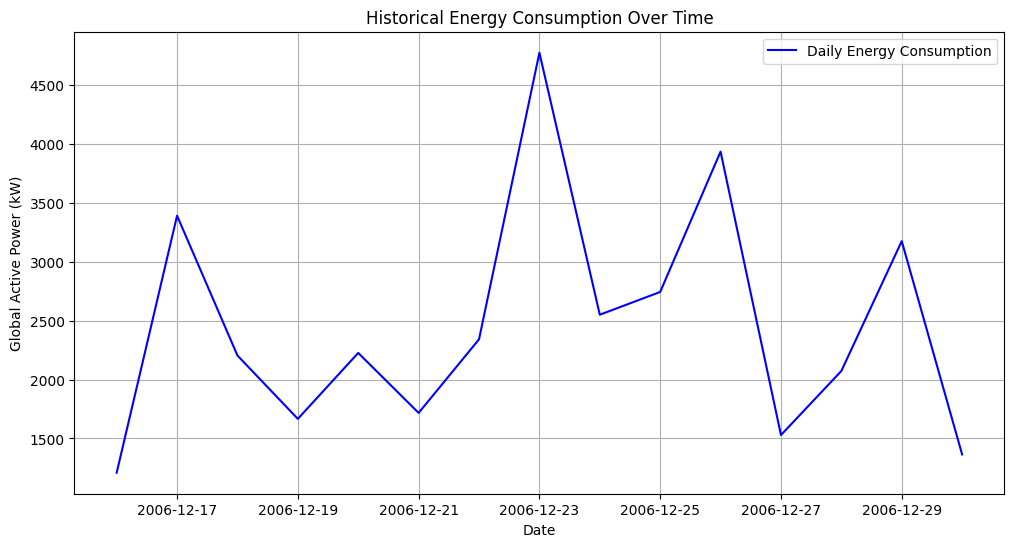

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# Check and ensure 'Date' is set as the index
if 'Date' in data_1000.columns:
    data_1000['Date'] = pd.to_datetime(data_1000['Date'], format='%d/%m/%Y', errors='coerce')
    data_1000.set_index('Date', inplace=True)

# Convert 'Global_active_power' to numeric and drop invalid rows
data_1000['Global_active_power'] = pd.to_numeric(data_1000['Global_active_power'], errors='coerce')
data_1000.dropna(subset=['Global_active_power'], inplace=True)

# Ensure the index is a DatetimeIndex for resampling
if not isinstance(data_1000.index, pd.DatetimeIndex):
    raise TypeError("Index must be a DatetimeIndex for resampling. Please check your data.")

# Resample data to daily consumption
daily_data = data_1000.resample('D').sum()

# Plot historical energy consumption
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Global_active_power'], label='Daily Energy Consumption', color='blue')
plt.title('Historical Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.grid()
plt.show()

Number of observations: 15


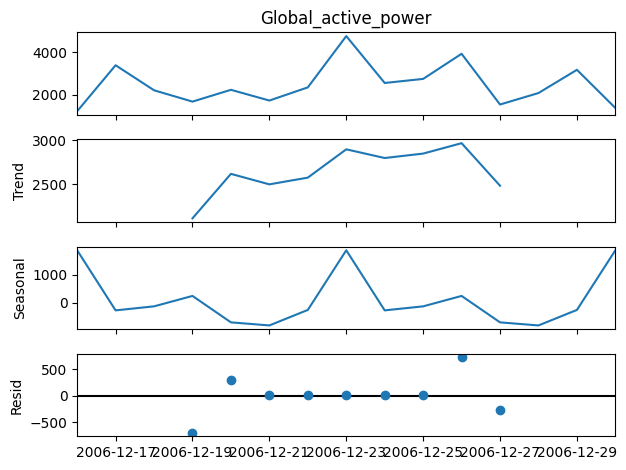

In [44]:
# Ensure 'daily_data' contains only numeric values
if 'Global_active_power' in daily_data.columns:
    daily_data = daily_data[['Global_active_power']]

# Check for non-numeric values and remove them
daily_data['Global_active_power'] = pd.to_numeric(daily_data['Global_active_power'], errors='coerce')
daily_data.dropna(inplace=True)

# Verify the number of observations
print(f"Number of observations: {daily_data.shape[0]}")

# Set the period dynamically based on the data
if daily_data.shape[0] >= 730:
    period = 365  # Yearly seasonality
elif daily_data.shape[0] >= 60:
    period = 30  # Monthly seasonality
elif daily_data.shape[0] >= 14:
    period = 7   # Weekly seasonality
else:
    raise ValueError("Not enough data for seasonal decomposition.")

# Decompose the time series
decomposition = seasonal_decompose(daily_data['Global_active_power'], model='additive', period=period)

# Plot the decomposition
decomposition.plot()
plt.show()

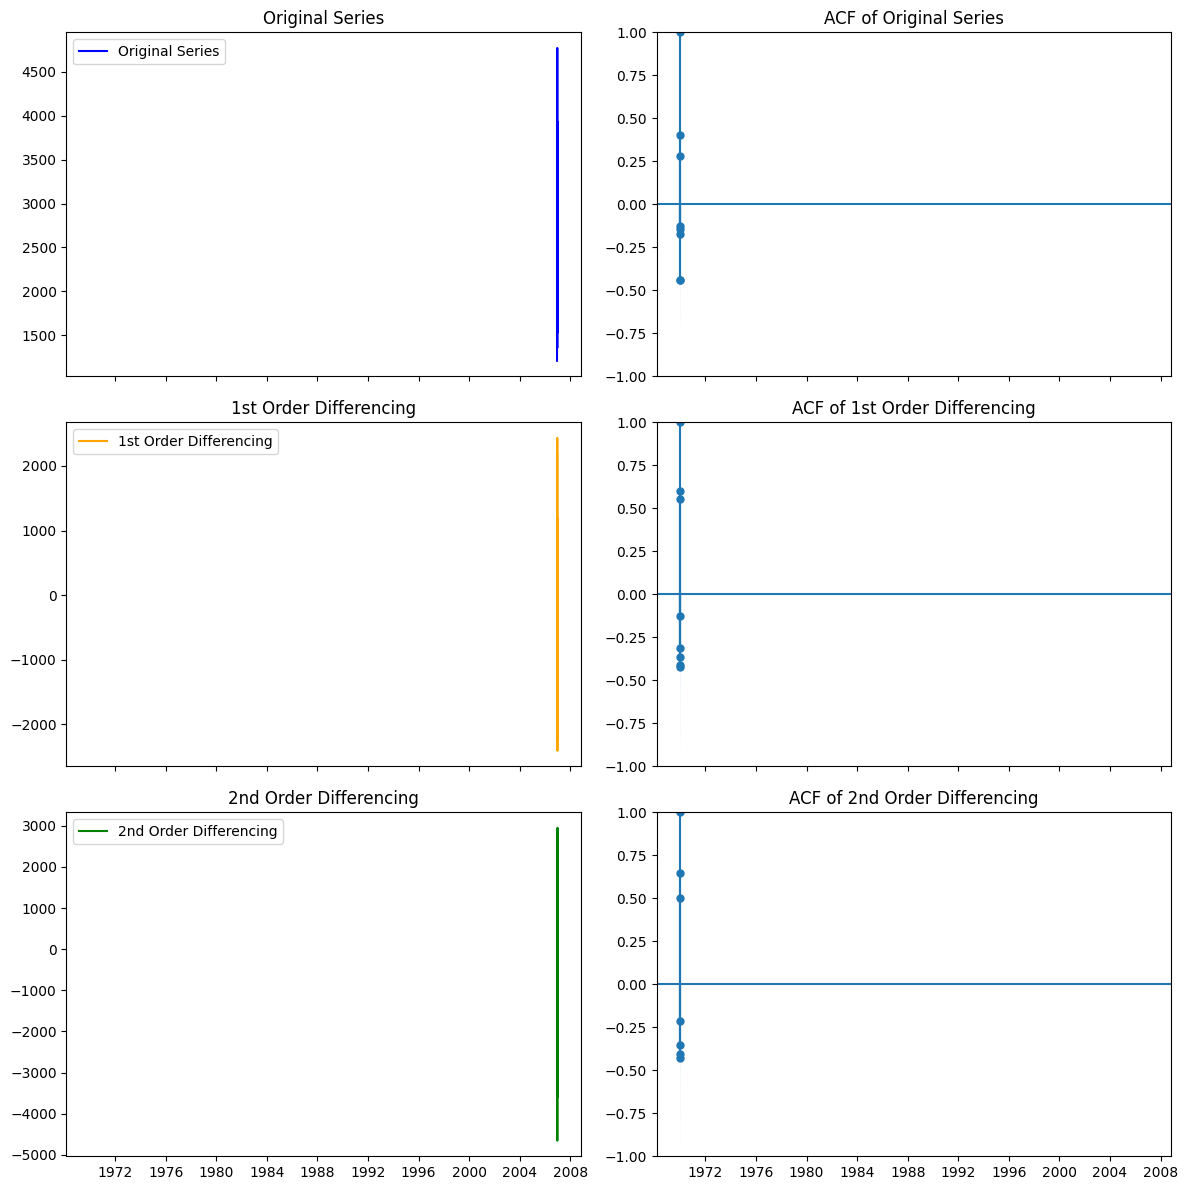

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Differencing and Autocorrelation Analysis
fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)

# Original Series
axes[0, 0].plot(daily_data['Global_active_power'], label='Original Series', color='blue')
axes[0, 0].set_title('Original Series')
axes[0, 0].legend(loc='best')
plot_acf(daily_data['Global_active_power'], ax=axes[0, 1])
axes[0, 1].set_title('ACF of Original Series')

# 1st Order Differencing
first_diff = daily_data['Global_active_power'].diff().dropna()
axes[1, 0].plot(first_diff, label='1st Order Differencing', color='orange')
axes[1, 0].set_title('1st Order Differencing')
axes[1, 0].legend(loc='best')
plot_acf(first_diff, ax=axes[1, 1])
axes[1, 1].set_title('ACF of 1st Order Differencing')

# 2nd Order Differencing
second_diff = first_diff.diff().dropna()
axes[2, 0].plot(second_diff, label='2nd Order Differencing', color='green')
axes[2, 0].set_title('2nd Order Differencing')
axes[2, 0].legend(loc='best')
plot_acf(second_diff, ax=axes[2, 1])
axes[2, 1].set_title('ACF of 2nd Order Differencing')

plt.tight_layout()
plt.show()

In [47]:
from statsmodels.tsa.stattools import  acf,pacf

x_acf=pd.DataFrame(acf(daily_data['Global_active_power']))
print(x_acf)

           0
0   1.000000
1  -0.173515
2  -0.124788
3   0.405134
4  -0.440923
5  -0.144624
6   0.283976
7  -0.437605
8   0.014281
9   0.156850
10 -0.207408
11  0.105759


    Lag       ACF  Lower Bound  Upper Bound
0     0  1.000000     1.000000     1.000000
1     1 -0.173515    -0.679575     0.332546
2     2 -0.124788    -0.645862     0.396286
3     3  0.405134    -0.123538     0.933805
4     4 -0.440923    -1.043884     0.162038
5     5 -0.144624    -0.825167     0.535920
6     6  0.283976    -0.404394     0.972345
7     7 -0.437605    -1.155349     0.280139
8     8  0.014281    -0.768816     0.797379
9     9  0.156850    -0.626314     0.940014
10   10 -0.207408    -0.998576     0.583760
11   11  0.105759    -0.699214     0.910731
12   12  0.101455    -0.707068     0.909978
13   13 -0.135816    -0.947593     0.675960
14   14  0.097224    -0.720351     0.914799


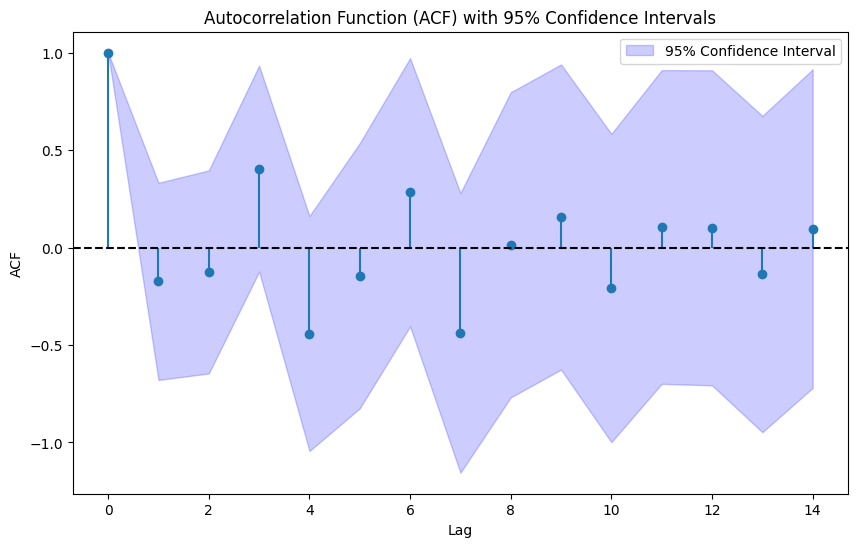

In [53]:
import pandas as pd
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt

# Compute the ACF values and confidence intervals
acf_values, confint = acf(daily_data['Global_active_power'], alpha=0.05, fft=True, nlags=20)

# Confidence intervals
lower_bound = confint[:, 0]
upper_bound = confint[:, 1]

# Create a DataFrame for better visualization
acf_df = pd.DataFrame({
    'Lag': range(len(acf_values)),
    'ACF': acf_values,
    'Lower Bound': lower_bound,
    'Upper Bound': upper_bound
})

print(acf_df)

# Plot the ACF with confidence intervals
plt.figure(figsize=(10, 6))
plt.stem(acf_df['Lag'], acf_df['ACF'], basefmt=" ")
plt.fill_between(acf_df['Lag'], acf_df['Lower Bound'], acf_df['Upper Bound'], color='blue', alpha=0.2, label='95% Confidence Interval')
plt.axhline(0, linestyle='--', color='black')
plt.title('Autocorrelation Function (ACF) with 95% Confidence Intervals')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.legend()
plt.show()



/home/mavia/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


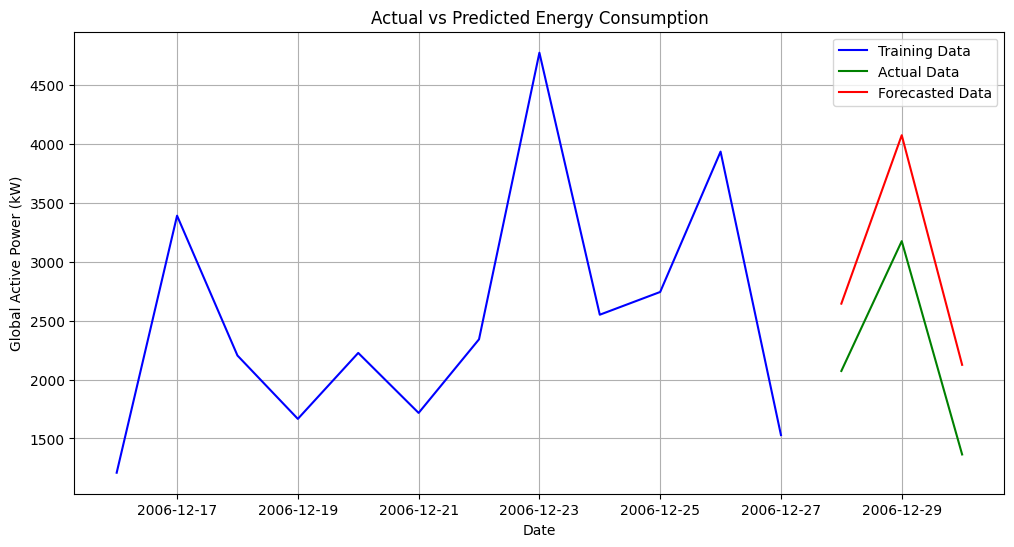

Mean Squared Error: 571002.0522303613
Root Mean Squared Error: 755.6467774233946


In [45]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Split data into training and testing sets
train_size = int(len(daily_data) * 0.8)
train, test = daily_data[:train_size], daily_data[train_size:]

# Fit an ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Adjust order as necessary
arima_model = model.fit()

# Forecast the next values
forecast = arima_model.forecast(steps=len(test))
forecast_index = test.index

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data', color='blue')
plt.plot(test, label='Actual Data', color='green')
plt.plot(forecast_index, forecast, label='Forecasted Data', color='red')
plt.title('Actual vs Predicted Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.grid()
plt.show()

# Evaluate the model
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.23202D-01    |proj g|=  2.92473D-04
  ys=-1.301E+00  -gs= 6.004E-02 BFGS update SKIPPED

At iterate    5    f=  1.04642D-01    |proj g|=  2.39958D+01

At iterate   10    f= -1.22897D-01    |proj g|=  1.53661D+03
  ys=-1.392E-03  -gs= 2.747E-02 BFGS update SKIPPED

At iterate   15    f= -1.96663D-01    |proj g|=  9.83045D+03

At iterate   20    f= -2.40676D-01    |proj g|=  2.69816D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F

/tmp/ipykernel_8000/495654805.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_data = daily_data.fillna(method='ffill').fillna(method='bfill')
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


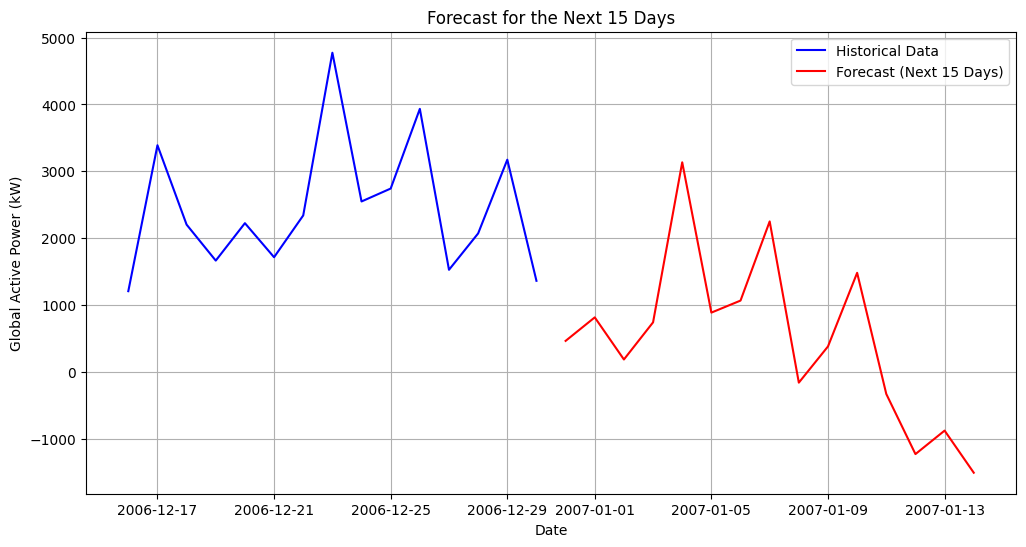

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import numpy as np

# Check for and handle missing values
daily_data = daily_data.fillna(method='ffill').fillna(method='bfill')

# Fit a SARIMAX model using the entire dataset
model = SARIMAX(daily_data, order=(1, 1, 0), seasonal_order=(0, 1, 0, 12), enforce_stationarity=False, enforce_invertibility=False)
sarimax_model = model.fit()

# Forecast the next 15 days
forecast_steps = 15
forecast = sarimax_model.forecast(steps=forecast_steps)

# Create a date range for the forecasted values
forecast_index = pd.date_range(start=daily_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Plot the historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data, label='Historical Data', color='blue')
plt.plot(forecast_index, forecast, label='Forecast (Next 15 Days)', color='red')
plt.title('Forecast for the Next 15 Days')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# lets run sarimax 
import statsmodels.api as sm
import warnings

p,d,q = 3,1,2

model =sm.tsa.statespace.SARIMAX(df['Close'],order=(p,d,q),seasonal_order=(p,d,q,12))
model=model.fit()
print(model.summary())